- pandas is shortened to "pd"
    - used by doing pd.function_name 
    - ex pd.read_csv()
- you can name it whatever you want, but for readability, using the common shorthands is important

### Basic data exploration
- 1: look at data you've read in
- 2: Check for any issues in the data
- 3: ensurea ll missing values are handle

#### Inspection
- info()
    - gives basic info like column names, variable type, etc.
- shape()
- columns()

# Practice Session

In [19]:
# Import the libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plots
import seaborn as sns # for nicer plots
import re # regular expressions

# Read the data
toolik_fish = pd.read_csv(
    # Path to the data
    "../data/raw_data/toolik_fish.csv",
    # not a number values are "#N/A"
    na_values="."
    )

In [20]:
# inspect data
toolik_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6726 entries, 0 to 6725
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6726 non-null   object 
 1   Site                  6561 non-null   float64
 2   Lake                  6726 non-null   object 
 3   Fish I.D.             3311 non-null   object 
 4   Species               6603 non-null   object 
 5   Total length (mm)     6551 non-null   float64
 6   FL (mm)               3093 non-null   float64
 7   SL (mm)               765 non-null    float64
 8   Mass (g)              6498 non-null   float64
 9   Sampling              4239 non-null   object 
 10  Otos                  1726 non-null   object 
 11  Stomach               1447 non-null   object 
 12  Sex                   1046 non-null   object 
 13  Mature                862 non-null    object 
 14  Gonads                278 non-null    object 
 15  P1                   

In [21]:
def snakecase(s):
        """Convert CamelCase to snake_case and lowercase the string
        s: string
        """
        s = re.sub(
        # Find a lower case letter or number (group 1)
        # followed by an upper case letter (group 2):
        '([a-z0-9])([A-Z])',
        # Replace with - 
        # \1, the lower case letter, 
        # _, an underscore, and
        # \2, the upper case letter:
        r'\1_\2',
        # Perform the search and replace in 
        # the string s:
        s 
        )
        s = re.sub(
                ' ', # Find a space
                '_', # Replace with an underscore
                s    # In the string
                ).lower()  # Convert to lower case
        return s

print(snakecase("HelloWorld"))

hello_world


In [22]:
toolik_fish.columns = [
    snakecase(col) for col in toolik_fish.columns
]

toolik_fish.columns

Index(['date', 'site', 'lake', 'fish_i.d.', 'species', 'total_length_(mm)',
       'fl_(mm)', 'sl_(mm)', 'mass_(g)', 'sampling', 'otos', 'stomach', 'sex',
       'mature', 'gonads', 'p1', 'age', 'total_otolith_radius', 'do1..do52',
       'fin_clip', 'locality', 'scales', 'comments'],
      dtype='object')

<Axes: xlabel='total_length_(mm)', ylabel='mass_(g)'>

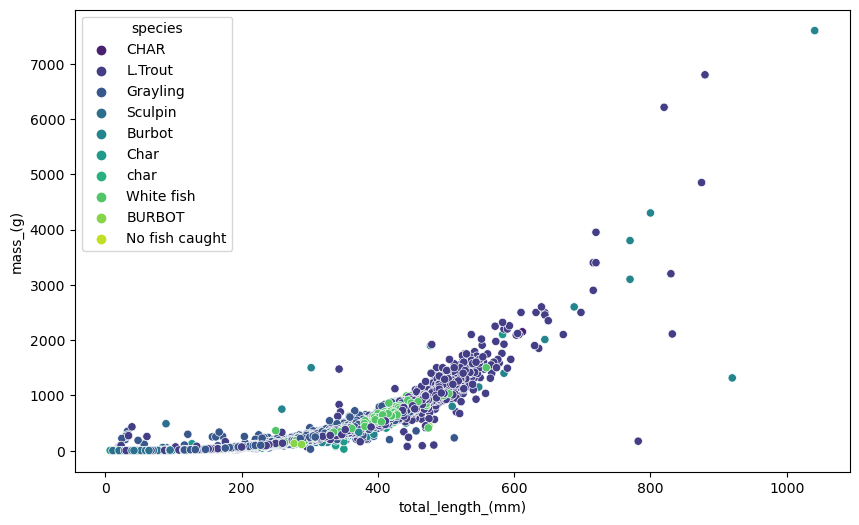

In [23]:
fig = plt.figure(figsize=(10, 6)) # This command sets the size of the figure

sns.scatterplot(
    data=toolik_fish,
    x='total_length_(mm)',
    y='mass_(g)',
    hue='species',
    palette='viridis'
)
